In [13]:
import numpy
from matplotlib import pyplot
%matplotlib inline
import geneq

In [57]:
N = 50
x_start, x_end = -2.0, 2.0
y_start, y_end = -0.5, 0.5
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)
X,Y = numpy.meshgrid(x,y)
Nv = 15
xv = numpy.linspace(x_start, x_end, Nv)
yv = numpy.zeros(Nv)
gamma = 5.0

In [64]:
u, v, psi = numpy.zeros_like(X), numpy.zeros_like(X), numpy.zeros_like(X)
for i in range(Nv):
    u_new, v_new = geneq.vel_vor(gamma, xv[i], yv[i], X, Y)
    psi_new = geneq.stream_func_vor(gamma, xv[i], yv[i], X, Y)
    u, v, psi = u + u_new, v + v_new, psi + psi_new

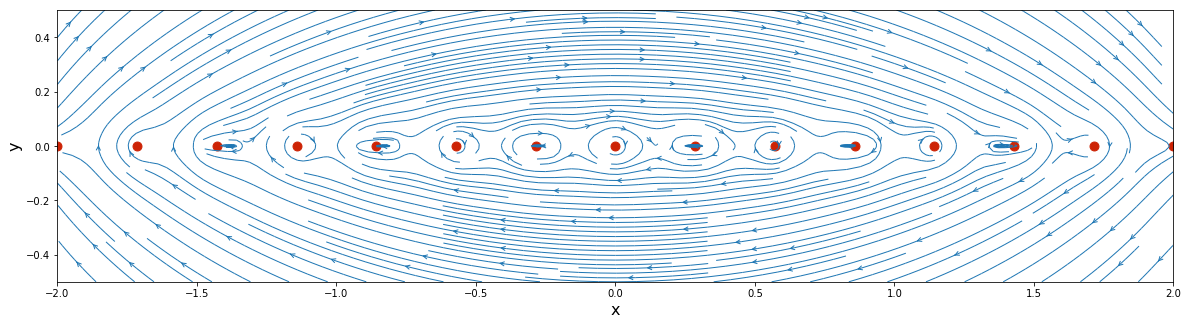

In [59]:
width = 20
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(xv, yv, color='#CD2305', s=80, marker='o');

In [60]:
a = (x_end - x_start) / Nv
ua = (+gamma / (2 * a) * numpy.sinh(2 * numpy.pi * Y / a) / 
      (numpy.cosh(2 * numpy.pi * Y / a) - numpy.cos(2 * numpy.pi * X / a)))
va = (-gamma / (2 * a) * numpy.sin(2 * numpy.pi * X / a) / 
      (numpy.cosh(2 * numpy.pi * Y / a) - numpy.cos(2 * numpy.pi * X / a)))

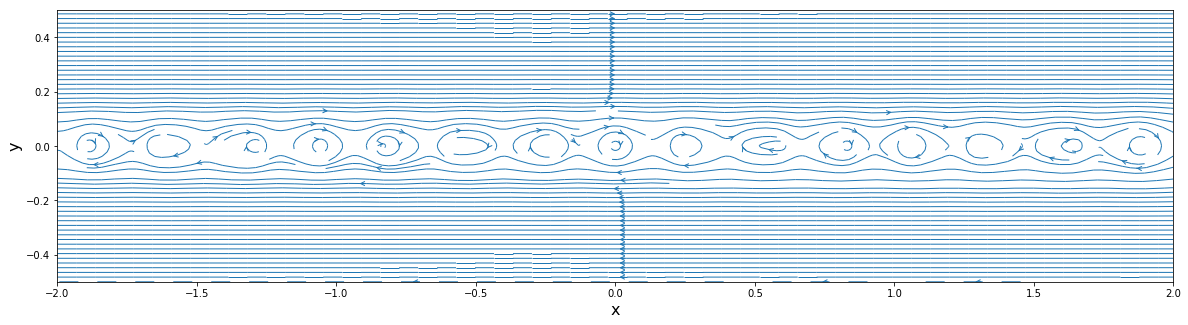

In [62]:
width = 20
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, ua, va, density=2, linewidth=1, arrowsize=1, arrowstyle='->');
#pyplot.scatter(xv, yv, color='#CD2305', s=80, marker='o');